In [107]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geoplot as geoplot
import geopandas as gpd
from speednav import utilities as util
import datetime

### Load all the data.

In [108]:
# load the SPEED data
data = util.load_data()

# load the dictionary with the variable names and decriptions
data_vars  = util.DATA_VARS

print('Total number of variables: ' + str(len(data_vars)))
print('\n')
print('Variable names:\n\n' + str(data_vars.keys()))

Total number of variables: 142


Variable names:

dict_keys(['AEI0001', 'AEI0002', 'AEI0003', 'AEI0004', 'DL0001', 'DL0002', 'DL0003', 'DL0004', 'DL0005', 'DL0006', 'DL0007', 'DL0008', 'DL0009', 'DL0010', 'DL0011', 'DL0012', 'ER0001', 'ER0002', 'ER0003', 'ER0004', 'ER0005', 'ER0006', 'ER0007', 'ER0008', 'ER0009', 'ER0010', 'ER0011', 'ER0012', 'ER0013', 'INI0001', 'INI0002', 'INI0003', 'INI0004', 'INI0005_1', 'INI0005_2', 'INI0005_3', 'INI0005_4', 'INI0005_5', 'INI0005_6', 'INI0005_7', 'INI0005_8', 'INI0005_9', 'INI0005_10', 'INI0005_11', 'INI0005_12', 'INI0005_13', 'INI0005_14', 'INI0005_15', 'INI0005_16', 'INI0005_17', 'INI0005_18', 'INI0006', 'INI0007', 'INI0008', 'INI0009', 'INI0010', 'INI0011_1', 'INI0011_2', 'INI0011_3', 'INI0011_4', 'INI0011_5', 'INI0012', 'INI0013', 'INI0014', 'INI0015', 'INI0016', 'INI0017_1', 'INI0017_2', 'INI0017_3', 'INI0017_4', 'INI0017_5', 'INI0018', 'INI0019', 'INI0020', 'INI0021', 'INI0022', 'INI0023_1', 'INI0023_2', 'INI0023_3', 'INI0023_4', 'INI0023_5'

### Apply some basic filters to the data.
Filter the data by country. 


```location = True``` filters those events which have no location.

In [109]:
country_name = 'Liberia' # 'Sierra Leone', 'Philippines', 'Liberia' 
data_country = util.filter_data(data, country_name, location=True)

##### Additional filtering

In [110]:
# e.g remove data for events with an unspecified origin variable (O0001)
print('description of variable being filtered:')
print(data_vars['O0001'])

data_filter = data_country.loc[(data_country.O0001 != 13)]

description of variable being filtered:
The attributed origins of the event


### Plot the event maps
Each translucent red dot represents an event

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


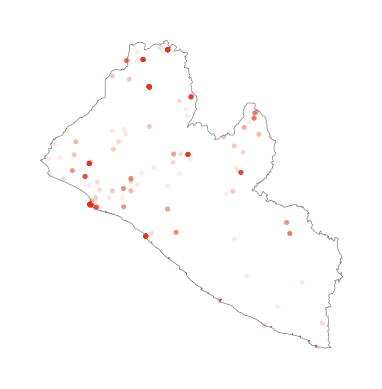

In [135]:
util.plot_event_map(data_filter, kde=False, 
                    marker_linewidth=0, 
                    color = [0.9,0.2,0.1],
                    alpha = 0.1)
#plt.tight_layout()
#plt.savefig(str(country_name) + '_points.jpeg', dpi=300, transparent=True)

##### Now plot a kernel density estimate (kde) map based on the event positions

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


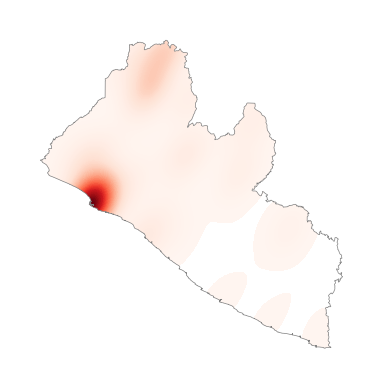

In [136]:
util.plot_event_map(data_filter, kde=True, clip_border=True)
#plt.tight_layout()
#plt.savefig(str(country_name) + '_kde.jpeg', dpi=300, transparent=True)

### Weight the kde map according to an intensity variable.
Instead of making a kde map where each event is weighted equally,
you can make the kde weighted based on an intensity variable, such as ER0005, the type of symbolic act event.

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


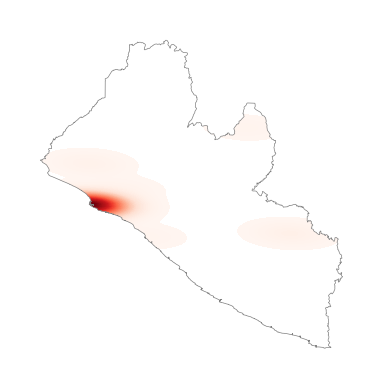

In [137]:
plt.figure()
util.plot_event_map(data_filter, kde=True, weights_var = 'ER0005')

### Plot a time series grid of maps.

##### First, define the time intervals of interest.

In [113]:
date_var = 'DL0002' # choose a time variable to use as reference. Here, it's the earliest event date

In [114]:
time_first = np.min(data_filter[date_var])
time_last = np.max(data_filter[date_var])
times = util.get_time_bins(time_first, time_last, interval='year')
print('years: n' + str(times))

years: n[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009]


##### Create a list of dataframes containing the data in each time interval. 

In [115]:
data_times = util.filter_times(data_filter, times, date_var=date_var, cumulative=False)

##### Plot the grid.

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:721: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim((xmin, xmax))
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:722: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim((ymin, ymax))
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` proper

/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/Users/annie/opt/anaconda3/envs/py38/lib/python3.8/site-packages/geoplot/

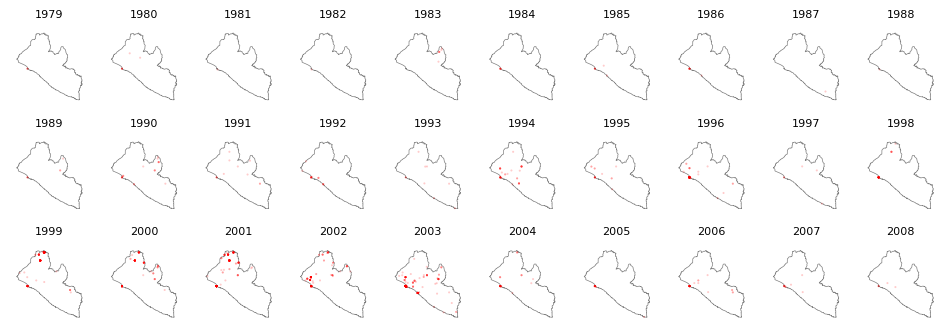

In [116]:
util.plot_map_series(data_times, titles=times, alpha=0.2, save=False)

### Plot distribution of variable differences between subsequent events

##### distance between subsequent events histogram

In [117]:
var = 'DL0010'

Calculating distance using DL0010 and DL0011


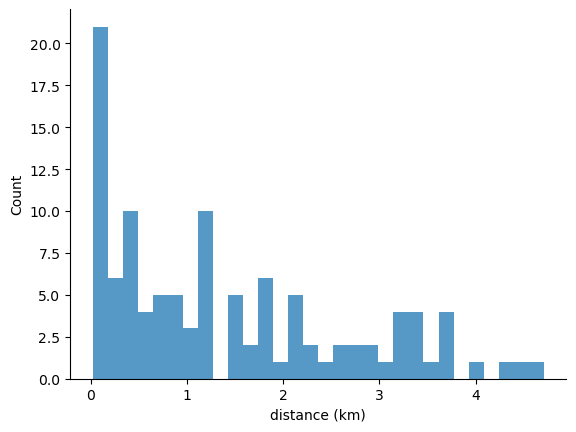

In [118]:
var_diff_subseq_ev = util.calc_var_subseq(var, data_filter)
#plt.xlim([0,5])

sns.histplot(var_diff_subseq_ev[var_diff_subseq_ev>0], 
             edgecolor=None, bins=30)
sns.despine()
plt.xlabel('distance (km)')
#plt.savefig(str(country_name) + ' dist of '+ var + '.jpeg', dpi=300)
#, clip=(np.nanmin(var_diff_subseq_ev), np.max(var_diff_subseq_ev)))  #, log_scale=(False, True))

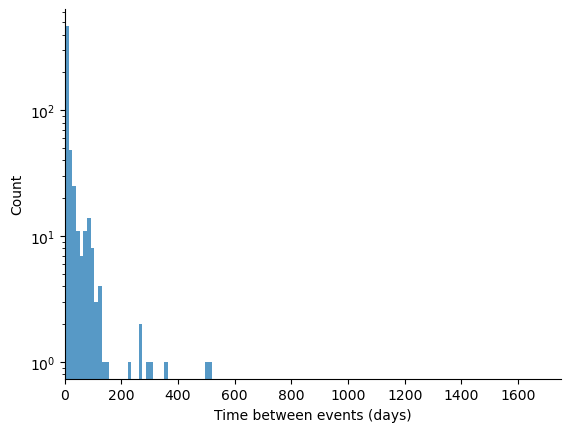

In [119]:
var = 'DL0002'

var_diff_subseq_ev = util.calc_var_subseq(var, data_filter)
plt.xlim([0,1750])

sns.histplot(var_diff_subseq_ev[var_diff_subseq_ev>0], 
             edgecolor=None, bins=40, log_scale = (False, True))
sns.despine()
plt.xlabel('Time between events (days)')
#plt.savefig(str(country_name) + ' dist of subseq '+ var + '.jpeg', dpi=300)
#, clip=(np.nanmin(var_diff_subseq_ev), np.max(var_diff_subseq_ev)))  #, log_scale=(False, True))

### Plot distribution of variables for all events

##### Distribution of origin variable

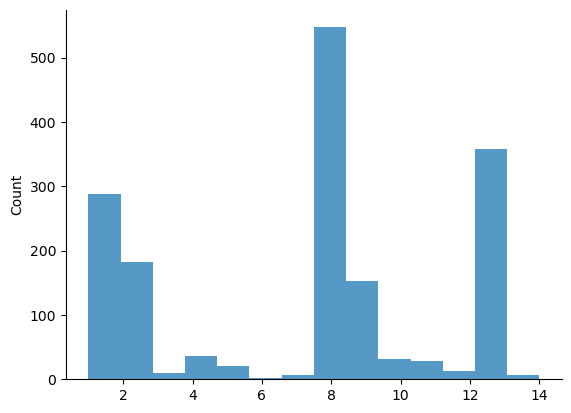

In [139]:
var = 'O0001'
var_values = np.array(data_filter[var])
var_vals_float = []
for i in range(len(var_values)):
    if ',' in var_values[i]:
        var_float = var_values[i].split(",")
        for j in range(len(var_float)):
            var_vals_float.append(var_float[j])
    else: 
        var_vals_float.append(var_values[i])
var_vals_float = np.array(var_vals_float, dtype=float)

#clip = (np.nanmin(var_values), np.max(var_values))
sns.histplot(var_vals_float, bins=14, edgecolor=None)#'O0001'
sns.despine()

##### Distribution of event lengths

[-330   -2  -25  -25]


(0.0, 7000.0)

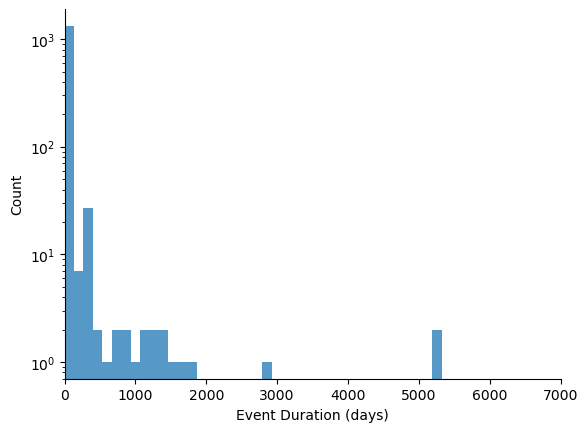

In [141]:
event_lengths = data_filter['DL0003']-data_filter['DL0002']
var_values = np.array(event_lengths.dt.days)
print(var_values[var_values<0])
#clip = (np.nanmin(var_values), np.max(var_values))
sns.histplot(var_values[var_values>=0], log_scale=(False, True), bins=40, edgecolor=None)
#sns.histplot(var_values[var_values>=0], bins=50, edgecolor=None)
sns.despine()
plt.xlabel('Event Duration (days)')
plt.xlim([0,7000])
#plt.savefig('dist of event duration.jpeg', dpi=300)

### Plot variables as a function of time.
To plot a variable vs time, we have to have a sliding window mean of the variable, so we have to choose a window size. Here, we choose 90 days, and look at increments of 1 day.

In [143]:
var = 'TE0015'
window_size = 90 # days
step_size = 1 # days
date_var = 'DL0002'# first date

mean_vs_time = util.calc_stat_vs_time(data_filter, 
                                      var, 
                                      window_size, 
                                      date_var=date_var, 
                                      step=step_size, 
                                      calc_type='mean')

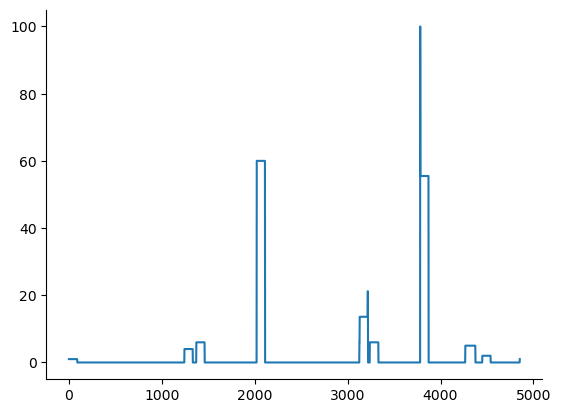

In [144]:
plt.plot(np.nan_to_num(np.array(mean_vs_time)))
sns.despine()

### Plot counts as a function of time.
both instananeous and cumulative

In [145]:
var = 'AEI0001'
window_size = 90
step_size = 1
date_var = 'DL0002'# first date
print(np.min(data_filter[date_var]))
print(np.max(data_filter[date_var]))
count_vs_time = util.calc_stat_vs_time(data_filter, var, window_size, 
                                  step=step_size, 
                                  calc_type='count')
cumulcount_vs_time = count_vs_time.cumsum()

1979-01-01 00:00:00
2008-09-07 00:00:00


['1979-01-01T00:00:00.000000' '1979-01-02T00:00:00.000000'
 '1979-01-03T00:00:00.000000' ... '2008-09-05T00:00:00.000000'
 '2008-09-06T00:00:00.000000' '2008-09-07T00:00:00.000000']


Text(0, 0.5, 'Count')

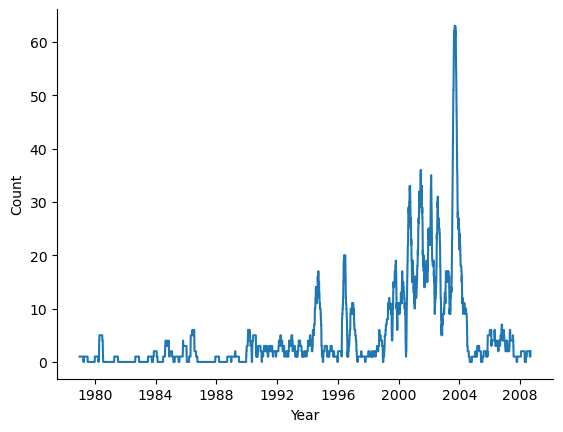

In [146]:
years = np.arange(np.min(data_filter[date_var]), np.max(data_filter[date_var])+datetime.timedelta(days=1), datetime.timedelta(days=1))
print(years)
plt.plot(years, np.array(count_vs_time))
sns.despine()
plt.xlabel('Year')
plt.ylabel('Count')

#plt.savefig('count vs time' + str(country_name) + '.jpeg', dpi=300)

Text(0, 0.5, 'Count (cumulative)')

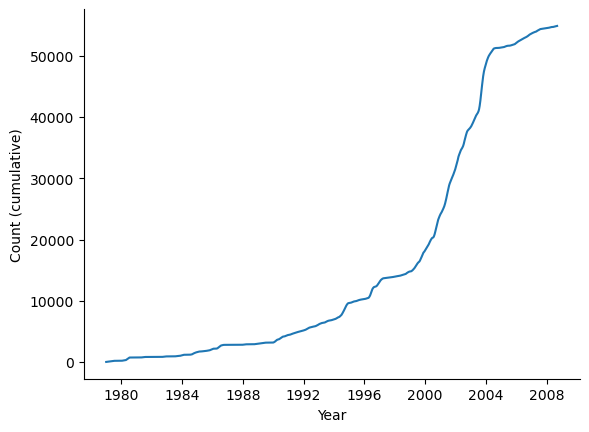

In [147]:
plt.plot(years, np.array(cumulcount_vs_time))
sns.despine()
plt.xlabel('Year')
plt.ylabel('Count (cumulative)')

#plt.savefig('cumul count vs time' + str(country_name) + '.jpeg', dpi=300)